# setup and imports

In [1]:
import fnmatch
import matplotlib.pyplot as plt
from ipywidgets import interactive
import numpy as np
import os
import glob
from scipy.ndimage import gaussian_filter as smooth
import platform

%run sessionlists
from VIGOR_utils import *
from VIGOR_plotting import *
from VIGOR_MODELS_Functions import *

plt.style.use('./Figures/test.mplstyle')

In [2]:
#### Define folder with data 
if platform.system()=='Linux':
    root="/home/david/Desktop/ALLDATA"
    savePath="/home/david/Desktop/Save"
elif platform.system()=='Darwin':
    root="/Users/tom/Desktop/DATA"
    savePath="/Users/tom/Desktop/Save"
if 'COLAB_GPU' in os.environ:
    !gdown --id 1BSepSzm1-KQJlUvv8C23p_qyHvtzvrZ8
    !unzip -qq /content/code/sequencesALLDATA.zip
    root="/content/code/sequencesALLDATA"
    savePath="/content/Save"
    print("I'm running on Colab")
print("Path to data is: %s"%root)

retval = os.getcwd()
print("Current working directory: %s" % retval)
print("Save Path: ", savePath)

print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/david/Desktop/ALLDATA
Current working directory: /home/david/Desktop/code
Save Path:  /home/david/Desktop/Save
Found 26 rats in the data folder


In [3]:
rat_markers = {}
sequence = {}

# define colors for each rat
palette = {'RatF00': (0.4, 0.0, 0.0), 'RatF01': (0.55, 0.13, 0.13), 'RatF02': (0.8, 0.2, 0.2),
           'RatM00': (0.0, 0.4, 0.0), 'RatM01': (0.13, 0.55, 0.13), 'RatM02': (0.2, 0.8, 0.2),
           'RatF32': (0.8, 0.2, 0.2), 'RatF33': (0.8, 0.2, 0.2),
           'RatM31': (0.13, 0.55, 0.13), 'RatM32': (0.2, 0.8, 0.2), 
           'RatF42': (0.8, 0.2, 0.2), 'RatM40': (0.13, 0.55, 0.13), 'RatM43': (0.2, 0.8, 0.2)}

# define brain status (lesion/CNO/intact) for each rat, used in plots
# needs to be properly implemented, setting is in behav_params for each session.
brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
               'RatF32': 'normal', 'RatF33': 'normal',
               'RatM31': 'normal', 'RatM32': 'normal',
                'RatF42': 'normal', 'RatM40': 'normal', 'RatM43': 'normal'
               }

markers = {'normal': 'o', 'thcre': 'd', 'lesion': 'x', 'biglesion': 'X'}
lines = {'normal': '-', 'thcre': '--', 'lesion': ':', 'biglesion': '-.'}

# define list of rats to be analyzed

# INTACT RATS
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43']


for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    # define marker and color for each rat, used in plots
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[palette[animal], markers[brainstatus[animal]], lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[palette[animal], markers[brainstatus[animal]], lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):

        biglesion = True if 'L' in session else False
        sequence[animal, session] = get_from_pickle(root, animal[0:6], session, name="sequence.p", biglesion=biglesion)

 

Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF32
Loading data for RatF33
Loading data for RatM31
Loading data for RatM32
Loading data for RatF42
Loading data for RatM40
Loading data for RatM43


# 2A $\mu_0$

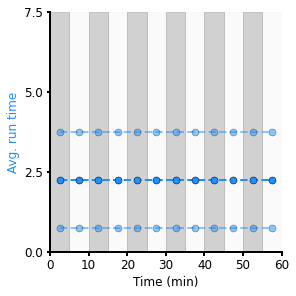

In [4]:
# plot variable median/mean fir each block
def Figure2A(ax=None):

    if ax is None:
        ax = plt.gca()

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]

    dummy_data = [2.25] * 12
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
            [np.mean(dummy_data[i]) for i in range(0, len(blocks))],  # or use median
            marker='o', ms=7, linewidth=2, color='dodgerblue', 
            zorder=4, markeredgecolor='k', markeredgewidth=0.5,
            ls='--')
    
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
            [np.mean(dummy_data[i])+1.5 for i in range(0, len(blocks))],  # or use median
            marker='o', ms=7, linewidth=2, color='dodgerblue', 
            zorder=4, markeredgecolor='k', markeredgewidth=0.5,
            ls='--', alpha=0.5)
    
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
            [np.mean(dummy_data[i])-1.5 for i in range(0, len(blocks))],  # or use median
            marker='o', ms=7, linewidth=2, color='dodgerblue', 
            zorder=4, markeredgecolor='k', markeredgewidth=0.5,
            ls='--', alpha=0.5)

    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, color='grey', alpha=rewardProbaBlock[i]/250, label="%reward: " + str(rewardProbaBlock[i]) if (i == 0 or i == 1) else "")
    
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Avg. run time", color='dodgerblue')
    ax.set_xlim(0, 60)
    ax.set_ylim(0, 7.5)
    ax.set_yticks([0, 2.5, 5, 7.5])


fig, ax = plt.subplots(1, 1, figsize = (4, 4))
Figure2A(ax=ax)

# 2B $\mu_t$

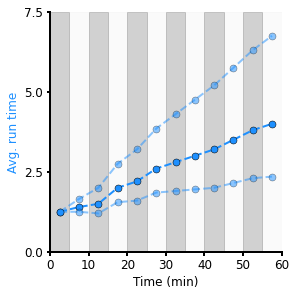

In [5]:
# plot variable median/mean fir each block
def Figure2B(ax=None):

    if ax is None:
        ax = plt.gca()

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]

    dummy_data = [1.25, 1.4, 1.5, 2, 2.2, 2.6, 2.8, 3, 3.2, 3.5, 3.8, 4]
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
            [np.mean(dummy_data[i]) for i in range(0, len(blocks))],  # or use median
            marker='o', ms=7, linewidth=2, color='dodgerblue', 
            zorder=4, markeredgecolor='k', markeredgewidth=0.5,
            ls='--')
    
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
            [np.mean(dummy_data[i])+(i*.25) for i in range(0, len(blocks))],  # or use median
            marker='o', ms=7, linewidth=2, color='dodgerblue', 
            zorder=4, markeredgecolor='k', markeredgewidth=0.5,
            ls='--', alpha=0.5)
    
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
            [np.mean(dummy_data[i])-(i*.15) for i in range(0, len(blocks))],  # or use median
            marker='o', ms=7, linewidth=2, color='dodgerblue', 
            zorder=4, markeredgecolor='k', markeredgewidth=0.5,
            ls='--', alpha=0.5)

    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, color='grey', alpha=rewardProbaBlock[i]/250, label="%reward: " + str(rewardProbaBlock[i]) if (i == 0 or i == 1) else "")
    
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Avg. run time", color='dodgerblue')
    ax.set_xlim(0, 60)
    ax.set_ylim(0, 7.5)
    ax.set_yticks([0, 2.5, 5, 7.5])


fig, ax = plt.subplots(1, 1, figsize = (4, 4))
Figure2B(ax=ax)

# 2C $\mu_R$

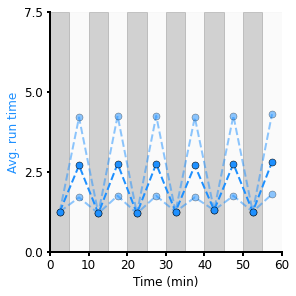

In [6]:
# plot variable median/mean fir each block
def Figure2C(ax=None):

    if ax is None:
        ax = plt.gca()

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]

    dummy_data = [1.25, 2.7, 1.2, 2.75, 1.2, 2.75, 1.25, 2.7, 1.30, 2.75, 1.25, 2.80]
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
            [np.mean(dummy_data[i]) for i in range(0, len(blocks))],  # or use median
            marker='o', ms=7, linewidth=2, color='dodgerblue', 
            zorder=4, markeredgecolor='k', markeredgewidth=0.5,
            ls='--')
    
    dummy_data = [1.25, 1.7, 1.2, 1.75, 1.2, 1.75, 1.25, 1.7, 1.30, 1.75, 1.25, 1.80]
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
            [np.mean(dummy_data[i]) for i in range(0, len(blocks))],  # or use median
            marker='o', ms=7, linewidth=2, color='dodgerblue', 
            zorder=4, markeredgecolor='k', markeredgewidth=0.5,
            ls='--', alpha=0.5)    
    
    dummy_data = [1.25, 4.2, 1.2, 4.25, 1.2, 4.25, 1.25, 4.2, 1.30, 4.25, 1.25, 4.30] 
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
            [np.mean(dummy_data[i]) for i in range(0, len(blocks))],  # or use median
            marker='o', ms=7, linewidth=2, color='dodgerblue', 
            zorder=4, markeredgecolor='k', markeredgewidth=0.5,
            ls='--', alpha=0.5)

    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, color='grey', alpha=rewardProbaBlock[i]/250, label="%reward: " + str(rewardProbaBlock[i]) if (i == 0 or i == 1) else "")
    
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Avg. run time", color='dodgerblue')
    ax.set_xlim(0, 60)
    ax.set_ylim(0, 7.5)
    ax.set_yticks([0, 2.5, 5, 7.5])


fig, ax = plt.subplots(1, 1, figsize = (4, 4))
Figure2C(ax=ax)

# 2D model + data

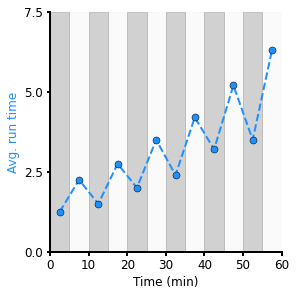

In [7]:
# plot variable median/mean fir each block
def Figure2D(ax=None):

    if ax is None:
        ax = plt.gca()

    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    blocks =  [[0, 300],  [300, 600],  [600, 900],  [900, 1200],
                [1200, 1500],  [1500, 1800],  [1800, 2100],  [2100, 2400],
                [2400, 2700],  [2700, 3000],  [3000, 3300],  [3300, 3600]]

    dummy_data = [1.25, 2.25, 1.5, 2.75, 2, 3.5, 2.4, 4.2, 3.2, 5.2, 3.5, 6.3]
    ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
            [np.mean(dummy_data[i]) for i in range(0, len(blocks))],  # or use median
            marker='o', ms=7, linewidth=2, color='dodgerblue', 
            zorder=4, markeredgecolor='k', markeredgewidth=0.5,
            ls='--')
    
    # dummy_data = [1.25, 1.7, 1.2, 1.75, 1.2, 1.75, 1.25, 1.7, 1.30, 1.75, 1.25, 1.80]
    # ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
    #         [np.mean(dummy_data[i]) for i in range(0, len(blocks))],  # or use median
    #         marker='o', ms=7, linewidth=2, color='dodgerblue', 
    #         zorder=4, markeredgecolor='k', markeredgewidth=0.5,
    #         ls='--', alpha=0.5)    
    
    # dummy_data = [1.25, 4.2, 1.2, 4.25, 1.2, 4.25, 1.25, 4.2, 1.30, 4.25, 1.25, 4.30] 
    # ax.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], 
    #         [np.mean(dummy_data[i]) for i in range(0, len(blocks))],  # or use median
    #         marker='o', ms=7, linewidth=2, color='dodgerblue', 
    #         zorder=4, markeredgecolor='k', markeredgewidth=0.5,
    #         ls='--', alpha=0.5)

    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, color='grey', alpha=rewardProbaBlock[i]/250, label="%reward: " + str(rewardProbaBlock[i]) if (i == 0 or i == 1) else "")
    
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Avg. run time", color='dodgerblue')
    ax.set_xlim(0, 60)
    ax.set_ylim(0, 7.5)
    ax.set_yticks([0, 2.5, 5, 7.5])


fig, ax = plt.subplots(1, 1, figsize = (4, 4))
Figure2D(ax=ax)

# 2E schematic distance

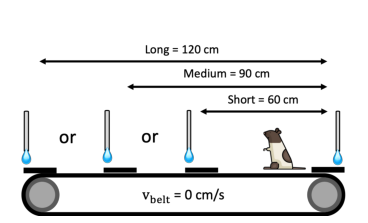

In [8]:
def Figure2E(ax=None, path=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    if path is None:
        path = "/home/david/Desktop/code/Figures/conditions_distance.png"

    img = plt.imread(path)
    ax.imshow(img)
    ax.axis("off")

Figure2E()

# 2F schematic vbelt

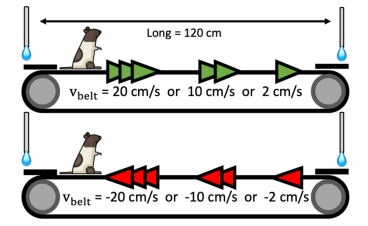

In [9]:
def Figure2F(ax=None, path=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    if path is None:
        path = "/home/david/Desktop/code/Figures/conditions_vbelt.png"

    img = plt.imread(path)
    ax.imshow(img)
    ax.axis("off")

Figure2F()

# 2GHI fit result dist

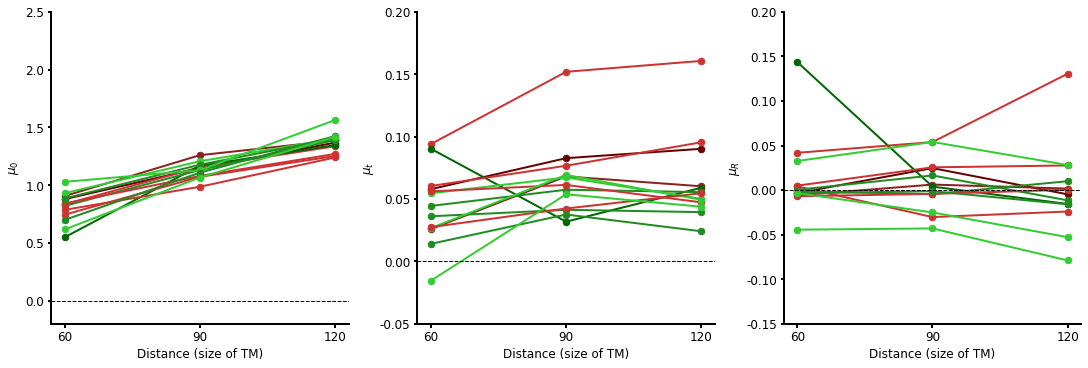

In [10]:
def Figure2G(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, mu_0, _, _, _, _, _ = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [mu_0[animal]["60"], mu_0[animal]["90"], mu_0[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
    
    ax.set_xlim(-0.1, 2.1)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["60", "90", "120"])
    ax.set_xlabel("Distance (size of TM)")

    ax.set_ylim(-.2, 2.5)
    ax.set_ylabel(r'$\mu_0$')
    ax.axhline(0, color='black', linestyle='--', linewidth=1)


def Figure2H(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, mu_t, _, _, _, _ = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [mu_t[animal]["60"], mu_t[animal]["90"], mu_t[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
    
    ax.set_xlim(-0.1, 2.1)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["60", "90", "120"])
    ax.set_xlabel("Distance (size of TM)")

    ax.set_ylim(-.05, .2)
    ax.set_ylabel(r'$\mu_t$')
    ax.axhline(0, color='black', linestyle='--', linewidth=1)


def Figure2I(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, mu_R, _, _, _ = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2], [mu_R[animal]["60"], mu_R[animal]["90"], mu_R[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
    
    ax.set_xlim(-0.1, 2.1)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(["60", "90", "120"])
    ax.set_xlabel("Distance (size of TM)")

    ax.set_ylim(-.15, .2)
    ax.set_ylabel(r'$\mu_R$')
    ax.axhline(0, color='black', linestyle='--', linewidth=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
Figure2G(axs[0])
Figure2H(axs[1])
Figure2I(axs[2])

# 2JKL fit results vbelt

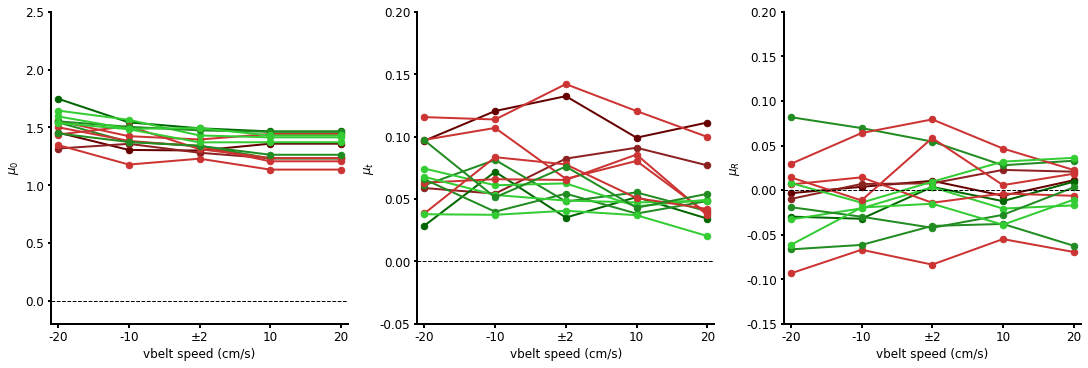

In [11]:
def Figure2J(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, mu_0, _, _, _, _, _ = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [mu_0[animal]["rev20"], mu_0[animal]["rev10"], mu_0[animal]["2"], mu_0[animal]["10"], mu_0[animal]["10"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
    
    ax.set_xlim(-0.1, 4.1)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["-20", "-10", "±2", "10", "20"])
    ax.set_xlabel("vbelt speed (cm/s)")

    ax.set_ylim(-.2, 2.5)
    ax.set_ylabel(r'$\mu_0$')
    ax.axhline(0, color='black', linestyle='--', linewidth=1)

def Figure2K(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, mu_t, _, _, _, _ = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [mu_t[animal]["rev20"], mu_t[animal]["rev10"], mu_t[animal]["2"], mu_t[animal]["10"], mu_t[animal]["20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
    
    ax.set_xlim(-0.1, 4.1)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["-20", "-10", "±2", "10", "20"])
    ax.set_xlabel("vbelt speed (cm/s)")

    ax.set_ylim(-.05, .2)
    ax.set_ylabel(r'$\mu_t$')
    ax.axhline(0, color='black', linestyle='--', linewidth=1)

def Figure2L(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    _, _, _, _, _, _, _, _, mu_R, _, _, _ = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [mu_R[animal]["rev20"], mu_R[animal]["rev10"], mu_R[animal]["2"], mu_R[animal]["10"], mu_R[animal]["20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
    
    ax.set_xlim(-0.1, 4.1)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(["-20", "-10", "±2", "10", "20"])
    ax.set_xlabel("vbelt speed (cm/s)")

    ax.set_ylim(-.15, .2)
    ax.set_ylabel(r'$\mu_R$')
    ax.axhline(0, color='black', linestyle='--', linewidth=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
Figure2J(axs[0])
Figure2K(axs[1])
Figure2L(axs[2])

# 2M mean run speed Distance

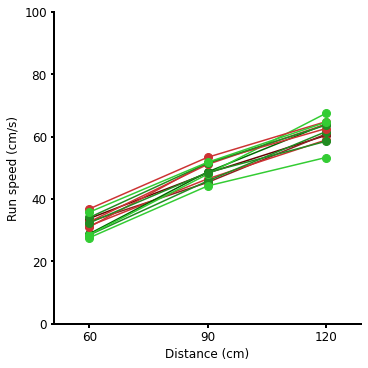

In [12]:
def Figure2M(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    conds = ["60", "90", "120"]
    run_speeds = {k: {a: [] for a in animalList} for k in conds}

    for cond, sessionlist in zip(conds, [dist60, dist90, dist120]):
        for animal in animalList:
            for session in matchsession(animal, sessionlist):
                params = get_from_pickle(root, animal, session, name="params.p")
                for elem in sequence[animal, session]:
                    if sequence[animal, session][elem][1] == 'run':
                        tm_speed = params['treadmillSpeed'][get_block(sequence[animal, session][elem][0])]
                        run_speeds[cond][animal].append(abs(sequence[animal, session][elem][-1]) - tm_speed)


    for animal in animalList:
        ax.plot([0, 1, 2], [np.mean(run_speeds[cond][animal]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=8)

    ax.set_xlim(-0.3, 2.3)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(conds)

    ax.set_ylim(0, 100)
    ax.set_ylabel("Run speed (cm/s)")
    ax.set_xlabel("Distance (cm)")
    ax.set

Figure2M()

# 2N mean run speed vbelt

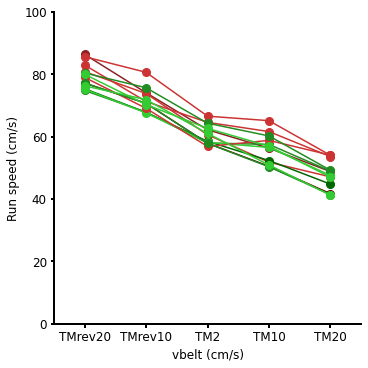

In [13]:
def Figure2N(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    conds = ["TMrev20", "TMrev10", "TM2", "TM10", "TM20"]
    run_speeds = {k: {a: [] for a in animalList} for k in conds}

    for cond, sessionlist in zip(conds, [TMrev20, TMrev10, TM2, TM10, TM20]):
        for animal in animalList:
            for session in matchsession(animal, sessionlist):
                params = get_from_pickle(root, animal, session, name="params.p")
                for elem in sequence[animal, session]:
                    if sequence[animal, session][elem][1] == 'run':
                        tm_speed = params['treadmillSpeed'][get_block(sequence[animal, session][elem][0])]
                        run_speeds[cond][animal].append(abs(sequence[animal, session][elem][-1]) - tm_speed)


    for animal in animalList:
        ax.plot([0, 1, 2, 3, 4], [np.mean(run_speeds[cond][animal]) for cond in conds], color=rat_markers[animal][0],
                marker=rat_markers[animal][1], markersize=8)

    ax.set_xlim(-0.5, 4.5)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(conds)
    ax.set_xlabel("vbelt (cm/s)")

    ax.set_ylim(0, 100)
    ax.set_ylabel("Run speed (cm/s)")

Figure2N()

# Figure 2

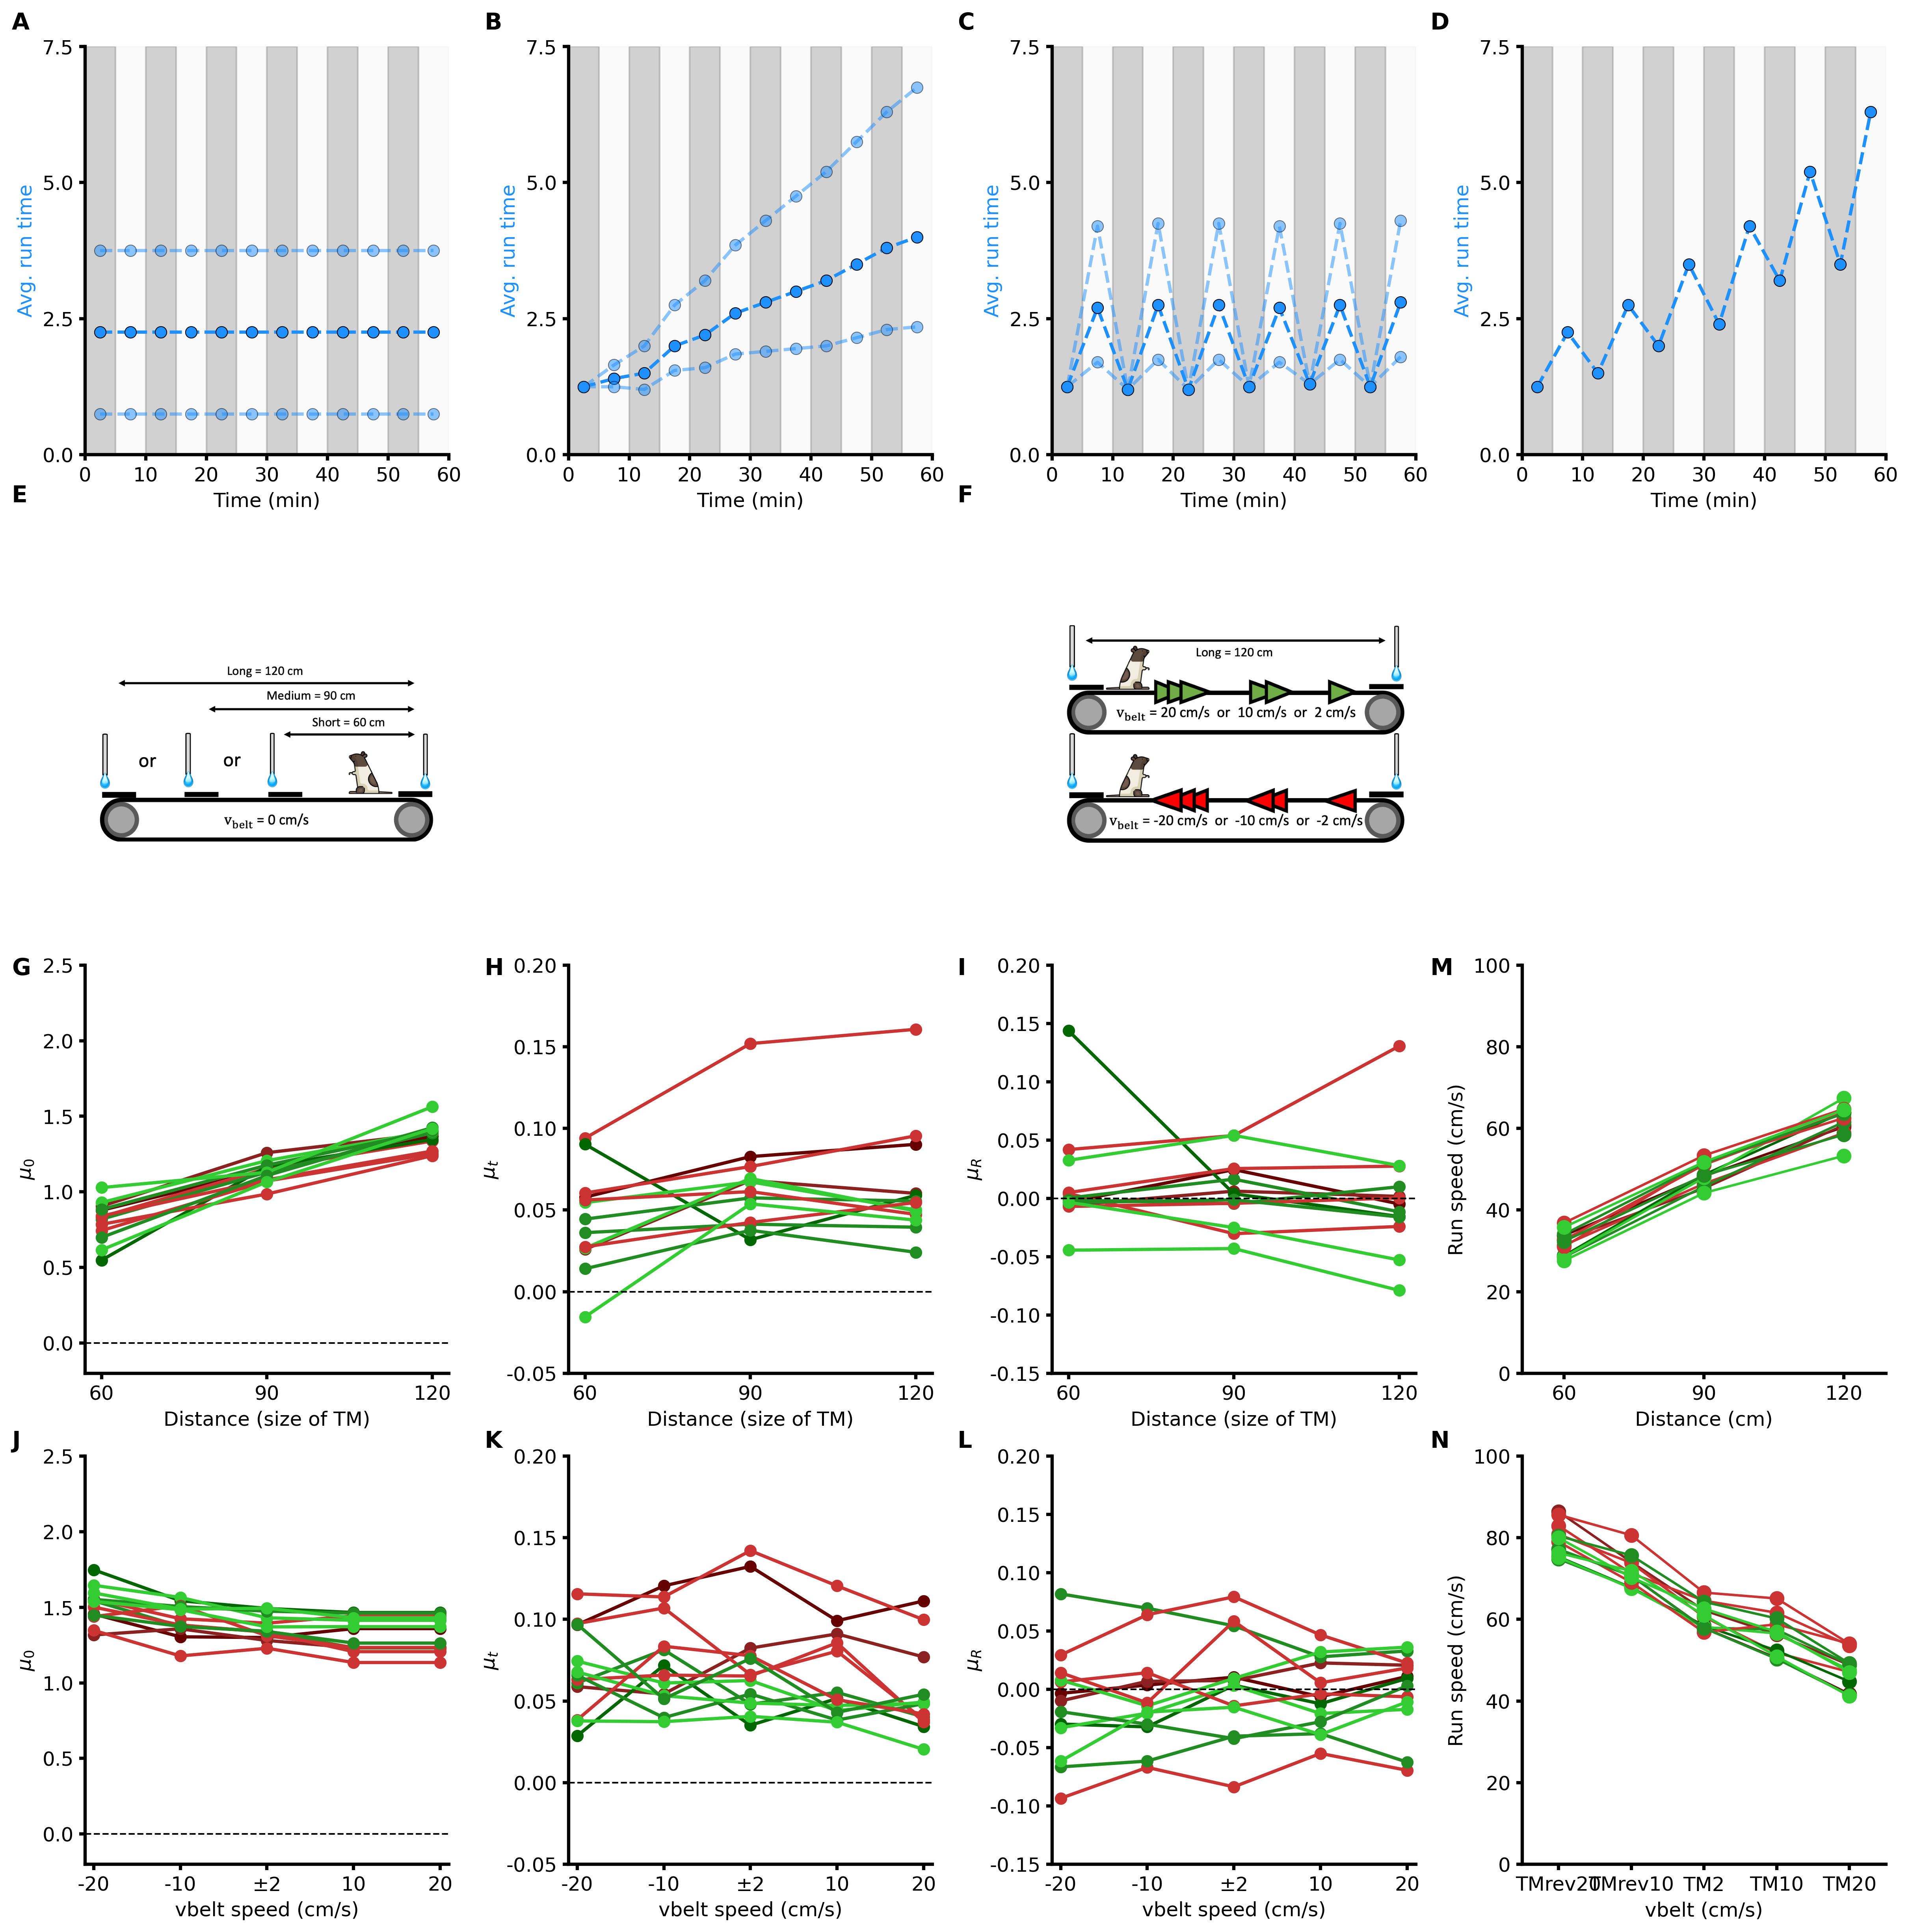

In [14]:

fig = plt.figure(figsize=(16, 16), constrained_layout=True, dpi=300)
gs = fig.add_gridspec(4, 4)

explanation_mu_0 = fig.add_subplot(gs[0, 0])
explanation_mu_t = fig.add_subplot(gs[0, 1])
explanation_mu_R = fig.add_subplot(gs[0, 2])
modeldata = fig.add_subplot(gs[0, 3])

schematic_distances = fig.add_subplot(gs[1, 0])
schematic_vbelts = fig.add_subplot(gs[1, 2])

fit_mu_0_distance = fig.add_subplot(gs[2, 0])
fit_mu_t_distance = fig.add_subplot(gs[2, 1])
fit_mu_R_distance = fig.add_subplot(gs[2, 2])
speed_distance = fig.add_subplot(gs[2, 3])

fit_mu_0_vbelt = fig.add_subplot(gs[3, 0])
fit_mu_t_vbelt = fig.add_subplot(gs[3, 1])
fit_mu_R_vbelt = fig.add_subplot(gs[3, 2])
speed_vbelt = fig.add_subplot(gs[3, 3])

figuresLabels={"A":[0.00, 1.00],
               "B":[0.25, 1.00],
               "C":[0.50, 1.00],
               "D":[0.75, 1.00],
               "E":[0.00, 0.75],
               "F":[0.50, 0.75],
               "G":[0.00, 0.50],
                "H":[0.25, 0.50],
                "I":[0.50, 0.50],
                "J":[0.00, 0.25],
                "K":[0.25, 0.25],
                "L":[0.50, 0.25],
                "M":[0.75, 0.50],
                "N":[0.75, 0.25]
                }

for label,coordinates in sorted(figuresLabels.items()):
    fig.text(coordinates[0], coordinates[1],
             label, figure=fig, 
             weight='bold', fontsize=14, ha='left', va='bottom')

Figure2A(ax=explanation_mu_0)
Figure2B(ax=explanation_mu_t)
Figure2C(ax=explanation_mu_R)
Figure2D(ax=modeldata)

Figure2E(ax=schematic_distances)
Figure2F(ax=schematic_vbelts)

Figure2G(ax=fit_mu_0_distance)
Figure2H(ax=fit_mu_t_distance)
Figure2I(ax=fit_mu_R_distance)

Figure2J(ax=fit_mu_0_vbelt)
Figure2K(ax=fit_mu_t_vbelt)
Figure2L(ax=fit_mu_R_vbelt)

Figure2M(ax=speed_distance)
Figure2N(ax=speed_vbelt)

# fig.tight_layout()
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()